# `hmmlearn`

Does not seem to work with `scikit-learn` 0.2.

    conda install -c omnia hmmlearn=0.3.0b=np112py36_0
    conda install -c omnia scikit-learn=0.19.1=py36hedc7406_0


# FFT

https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html

In [105]:
import random
import numpy as np
import pandas as pd

In [51]:
no_accel_samples = 100
window_accel_samples = 10
acceleration_model_function = np.random.random

In [1]:
import numpy as np
from hmmlearn import hmm

In [366]:
# Probabilities too high for 900 samples

np.random.seed(42)

n_components = 6

model = hmm.GaussianHMM(n_components=n_components
                        , covariance_type="full")

# Start probabilities
p_start_rum_wel = 0.6-0.01
p_start_eat_wel = 0.3-0.01
p_start_oth_wel = 0.1-0.01
p_start_rum_ill = 0.01
p_start_eat_ill = 0.01
p_start_oth_ill = 0.01

# Probability delta-in-transition from well to ill
p_d_wel_to_ill = 0.01
p_d_ill_to_well = 0.1

# Probability of transition from rumination
p_trans_rum_to_rum = 0.7
p_trans_rum_to_eat = 0.2
p_trans_rum_to_oth = 0.1

# Probability of transition from eating
p_trans_eat_to_rum = 0.3
p_trans_eat_to_eat = 0.5
p_trans_eat_to_oth = 0.2

# Probability of transition from other
p_trans_oth_to_rum = 0.3
p_trans_oth_to_eat = 0.3
p_trans_oth_to_oth = 0.4

# Prob of transition from rumination
p_trans_rum_wel_to_rum_wel = p_trans_rum_to_rum-p_d_wel_to_ill
p_trans_rum_wel_to_eat_wel = p_trans_rum_to_eat-p_d_wel_to_ill
p_trans_rum_wel_to_oth_wel = p_trans_rum_to_oth-p_d_wel_to_ill
p_trans_rum_wel_to_rum_ill = p_d_wel_to_ill
p_trans_rum_wel_to_eat_ill = p_d_wel_to_ill
p_trans_rum_wel_to_oth_ill = p_d_wel_to_ill

# Prob of transition from eating
p_trans_eat_wel_to_rum_wel = p_trans_eat_to_rum-p_d_wel_to_ill
p_trans_eat_wel_to_eat_wel = p_trans_eat_to_eat-p_d_wel_to_ill
p_trans_eat_wel_to_oth_wel = p_trans_eat_to_oth-p_d_wel_to_ill
p_trans_eat_wel_to_rum_ill = p_d_wel_to_ill
p_trans_eat_wel_to_eat_ill = p_d_wel_to_ill
p_trans_eat_wel_to_oth_ill = p_d_wel_to_ill

# Prob of transition from other
p_trans_oth_wel_to_rum_wel = p_trans_oth_to_rum-p_d_wel_to_ill
p_trans_oth_wel_to_eat_wel = p_trans_oth_to_eat-p_d_wel_to_ill
p_trans_oth_wel_to_oth_wel = p_trans_oth_to_oth-p_d_wel_to_ill
p_trans_oth_wel_to_rum_ill = p_d_wel_to_ill
p_trans_oth_wel_to_eat_ill = p_d_wel_to_ill
p_trans_oth_wel_to_oth_ill = p_d_wel_to_ill

# SICK
# Prob of transition from rumination sick
p_trans_rum_ill_to_rum_wel = p_d_ill_to_well
p_trans_rum_ill_to_eat_wel = p_d_ill_to_well
p_trans_rum_ill_to_oth_wel = p_d_ill_to_well
p_trans_rum_ill_to_rum_ill = p_trans_rum_to_rum - p_d_ill_to_well
p_trans_rum_ill_to_eat_ill = p_trans_rum_to_eat - p_d_ill_to_well
p_trans_rum_ill_to_oth_ill = p_trans_rum_to_oth - p_d_ill_to_well

# Prob of transition from eating sick
p_trans_eat_ill_to_rum_wel = p_d_ill_to_well
p_trans_eat_ill_to_eat_wel = p_d_ill_to_well
p_trans_eat_ill_to_oth_wel = p_d_ill_to_well
p_trans_eat_ill_to_rum_ill = p_trans_eat_to_rum - p_d_ill_to_well
p_trans_eat_ill_to_eat_ill = p_trans_eat_to_eat - p_d_ill_to_well
p_trans_eat_ill_to_oth_ill = p_trans_eat_to_oth - p_d_ill_to_well

# Prob of transition from other sick
p_trans_oth_ill_to_rum_wel = p_d_ill_to_well
p_trans_oth_ill_to_eat_wel = p_d_ill_to_well
p_trans_oth_ill_to_oth_wel = p_d_ill_to_well
p_trans_oth_ill_to_rum_ill = p_trans_oth_to_rum - p_d_ill_to_well
p_trans_oth_ill_to_eat_ill = p_trans_oth_to_eat - p_d_ill_to_well
p_trans_oth_ill_to_oth_ill = p_trans_oth_to_oth - p_d_ill_to_well

# Setting start probabilities 
model.startprob_ = np.array([p_start_rum_wel
                             , p_start_eat_wel
                             , p_start_oth_wel
                             , p_start_rum_ill
                             , p_start_eat_ill
                             , p_start_oth_ill])

model.transmat_ = np.array([[p_trans_rum_wel_to_rum_wel # 0 to
                             , p_trans_rum_wel_to_eat_wel # 0 to
                             , p_trans_rum_wel_to_oth_wel # 0 to
                             , p_trans_rum_wel_to_rum_ill # 0 to
                             , p_trans_rum_wel_to_eat_ill # 0 to
                             , p_trans_rum_wel_to_oth_ill], # 0 to
                            [p_trans_eat_wel_to_rum_wel # 1
                             , p_trans_eat_wel_to_eat_wel # 1
                             , p_trans_eat_wel_to_oth_wel # 1
                             , p_trans_eat_wel_to_rum_ill # 1
                             , p_trans_eat_wel_to_eat_ill # 1
                             , p_trans_eat_wel_to_oth_ill], # 1
                            [p_trans_oth_wel_to_rum_wel # 2
                             , p_trans_oth_wel_to_eat_wel # 2
                             , p_trans_oth_wel_to_oth_wel # 2
                             , p_trans_oth_wel_to_rum_ill # 2
                             , p_trans_oth_wel_to_eat_ill # 2
                             , p_trans_oth_wel_to_oth_ill], # 2
                            # Ill ruminating to 
                            [p_trans_rum_ill_to_rum_wel # 3
                             , p_trans_rum_ill_to_eat_wel # 3
                             , p_trans_rum_ill_to_oth_wel # 3
                             , p_trans_rum_ill_to_rum_ill # 3
                             , p_trans_rum_ill_to_eat_ill # 3
                             , p_trans_rum_ill_to_oth_ill], # 3
                            # Ill eating to
                            [p_trans_eat_ill_to_rum_wel # 4
                             , p_trans_eat_ill_to_eat_wel # 4
                             , p_trans_eat_ill_to_oth_wel # 4
                             , p_trans_eat_ill_to_rum_ill # 4
                             , p_trans_eat_ill_to_eat_ill # 4
                             , p_trans_eat_ill_to_oth_ill], # 4
                            # 5 Ill other to 
                            [p_trans_oth_ill_to_rum_wel # 5 
                             , p_trans_oth_ill_to_eat_wel # 5
                             , p_trans_oth_ill_to_oth_wel # 5
                             , p_trans_oth_ill_to_rum_ill # 5
                             , p_trans_oth_ill_to_eat_ill # 5
                             , p_trans_oth_ill_to_oth_ill] # 5
                           ])

# cols
# 1. frequency peak location
# 2. frequency peak magnitude
# 3. variance mgnitude

model.means_ = np.array([
      
      [2.5,  1.0, 2.0]    # 0 - rum 
    , [2.5,  0.1, 4.0]    # 1 - eat
    , [2.5,  0.1, 1.0]    # 2
    , [2.5,  1.0, 2.0]    # 3
    , [2.5,  0.1, 4.0]    # 4
    , [2.5,  0.1, 1.0]    # 5

])

model.covars_ = np.tile(np.identity(3), (n_components, 1, 1))

X, Z = model.sample(900)

In [365]:
len(Z)

900

In [372]:
pd.DataFrame(X, columns=['f_peak', 'f_magnitude', 'variance'])

,a,b,c
0,1.388120,1.318902,2.279041
1,3.510515,-0.369474,4.542560
2,1.928620,0.075917,-0.612549
3,3.450370,-0.012831,2.314247
4,1.796656,-1.139621,1.370525
5,3.097720,0.455617,2.110923
6,1.899746,1.947440,2.291034
7,1.864440,0.986503,0.942289
8,2.270550,1.389349,0.734881
9,3.591992,-0.328186,2.196861


In [371]:
pd.DataFrame??

In [ ]:
# peak location 2.5ish Hz
# peak magnitude
# noise variance

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 3, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 3, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1,
       0, 1, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 5, 5, 4, 4, 4, 3, 0, 0, 0, 2, 2, 2, 1, 0, 5, 5, 1, 0, 0,
       0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 5, 2, 2, 0, 0, 0,
       0, 0])

In [52]:
def accelerometer(
    no_accel_samples
    , acceleration_model_function):
    
    return pd.DataFrame(
        {'acceleration':
             acceleration_model_function(
                 number_of_accelerometer_samples)})

In [53]:
def features(acceleration_df
             , window_accel_samples
             , feature_function):
    
    length = len(acceleration_df)
    grouper = np.arange(length, dtype=int)//window_accel_samples
    
    return acceleration_df.groupby(grouper).apply(feature_function)

In [54]:
a_df = accelerometer(no_accel_samples=no_accel_samples
    , acceleration_model_function=acceleration_model_function)

f_df = features(acceleration_df=a_df
             ,window_accel_samples=window_accel_samples
             ,feature_function=sum)

### FFT

0.0 [1.38811988 1.31890218 2.27904129]
0.0 [ 3.51051528 -0.36947439  4.54256004]
0.0 [ 1.92861983  0.07591716 -0.61254901]
0.0 [ 3.45036968 -0.01283112  2.31424733]
0.0 [ 1.7966562  -1.13962066  1.37052504]
0.0 [3.09772047 0.45561728 2.11092259]
0.0 [1.89974615 1.94743982 2.291034  ]
0.0 [1.86444026 0.98650278 0.94228907]
0.0 [2.27054955 1.38934891 0.73488089]
0.0 [ 3.59199226 -0.32818605  2.19686124]
0.0 [ 2.71863832  0.98176104 -0.00908534]
0.0 [0.91670579 0.53936123 3.05712223]
0.0 [1.3694477  1.13442888 2.58212279]
0.0 [ 3.38774846 -0.73921752  3.69078762]
0.0 [0.99184671 1.19964698 0.82226788]
0.0 [2.08961669 0.91252582 5.35624003]
0.0 [1.46217012 0.02419625 1.97296353]
0.0 [3.29559546 0.06417396 5.56464366]
0.0 [2.10136161 0.03913591 2.58124954]
0.0 [ 3.54249162 -0.11967189  4.35711257]
0.0 [1.71074167 0.84371128 3.78783858]
0.0 [2.07313121 1.91540212 2.32875111]
0.0 [3.87186213 0.27555329 3.69071145]
0.0 [3.1731255  0.60789185 0.53648505]
0.0 [-0.15517605  0.44551794  3.60448355

0.0 [ 3.2621984   0.4234896  -0.59104229]
0.0 [3.36310023 0.20355982 2.10884563]
0.0 [1.38136857 0.98469015 2.5792915 ]
0.0 [0.53984199 3.06055862 0.80694005]
0.0 [2.45991149 0.82705394 3.71170848]
0.0 [ 1.62517962 -1.27637351  2.28488989]
0.0 [ 2.70709386 -0.56907274  2.03990469]
0.0 [ 0.90086351 -0.30672308  0.91165734]
0.0 [3.4213496  0.84209537 1.29929258]
0.0 [ 1.85950657  0.26839519 -0.19129014]
0.0 [2.5626854  2.11338725 1.13653533]
0.0 [2.73696142 0.54517968 1.19750727]
0.0 [3.79881132 2.20041391 1.34310572]
0.0 [2.04859034 0.56394651 2.28254353]
0.0 [1.79214732 1.09604769 3.24320491]
0.0 [ 1.24741099 -0.40246249  4.28117956]
0.0 [1.57437915 0.55588777 6.16500234]
0.0 [3.95561869 2.79927158 2.74580125]
0.0 [3.09342917 0.63504727 1.16079033]
0.0 [ 1.90522375 -1.18129767 -0.73772976]
0.0 [ 0.55211649 -0.12125362  0.7231867 ]
0.0 [1.15944682 1.01300022 1.30412617]
0.0 [ 2.76589848 -0.06712171  1.28257995]
0.0 [ 3.71373144 -0.04004285  1.88859888]
0.0 [ 3.23444903  0.28102156 -0.29

0.0 [ 3.84170076 -1.33065476  3.0859267 ]
0.0 [ 3.55521885 -1.63574774  2.00337551]
0.0 [3.04887884 2.31920127 4.25183675]
0.0 [1.58311531 0.10465368 1.59189916]
0.0 [ 2.02714858 -1.18443037  3.86791299]
0.0 [ 2.67675479 -0.19967665  3.94979538]
0.0 [ 2.45429977 -0.66499195  3.02862892]
0.0 [3.45847653 0.3806364  2.75862048]
0.0 [ 2.86144204  0.43834667 -1.08581586]
0.0 [ 2.3131304  -1.21924719  0.79701936]
0.0 [2.40987526 1.12338558 0.81541534]
0.0 [1.80180447 0.05717662 1.05802273]
0.0 [2.22429781 1.94069614 2.49616491]
0.0 [2.54426797 0.39329971 2.21128369]
0.0 [2.20522072 2.34617826 0.92212819]
0.0 [1.81128233 0.37565461 1.81547464]
0.0 [4.26168893 0.71715345 3.28939686]
0.0 [3.46800647 1.65152199 0.86231433]
0.0 [2.76853399 2.51300927 3.39659689]
0.0 [2.91464799 0.18382663 5.41045915]
0.0 [3.57424723 2.52618632 1.27936033]
0.0 [3.0288313  1.29657555 2.4631848 ]
0.0 [3.04140757 1.54171676 1.78412759]
0.0 [ 2.81059126 -0.9325239   4.39792705]
0.0 [1.51216932 1.03323245 3.36968752]
0

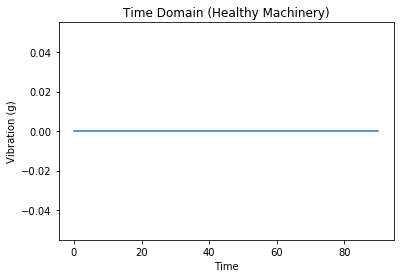

In [368]:
import numpy as np
from scipy import pi
import matplotlib.pyplot as plt
%matplotlib inline

# Sampling rate and time vector
start_time = 0 # seconds
end_time = 90 # seconds
sampling_rate = 10 # Hz
N = (end_time - start_time)*sampling_rate # array size

# Frequency domain peaks
peak1_hz = 2.5 # Hz where the peak occurs
peak1_mag = 1 # magnitude of the peak
peak2_hz = 2.6 # Hz where the peak occurs
peak2_mag = 0.5 # magnitude of the peak

# Noise control
noise_loc = 0 # the Gaussian noise is mean-centered
noise_mag = 2.0 # magnitude of added noise

# Vibration data generation
time = np.linspace(start_time, end_time, N)
#vib_data = (peak1_mag*np.sin(2*pi*peak1_hz*time) 
#            + np.random.normal(0, noise_mag, N) 
#           # + peak2_mag*np.sin(2*pi*peak2_hz*time) 
#           )

vib_data = np.zeros(N)

for v, x in zip(vib_data, X):
    print(v, x)
    

# Data plotting
plt.plot(time, vib_data)
plt.xlabel('Time')
plt.ylabel('Vibration (g)')
plt.title('Time Domain (Healthy Machinery)');

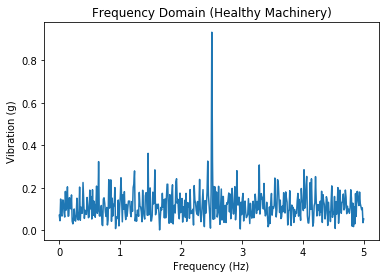

In [352]:
from scipy.fftpack import fft

# Nyquist Sampling Criteria
T = 1/sampling_rate # inverse of the sampling rate
x = np.linspace(0.0, 1.0/(2.0*T), int(N/2))

# FFT algorithm
yr = fft(vib_data) # "raw" FFT with both + and - frequencies
y = 2/N * np.abs(yr[0:np.int(N/2)]) # positive freqs only

# Plotting the results
plt.plot(x, y)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (Healthy Machinery)');

In [347]:
from scipy.fftpack import ifft
iii = np.real(ifft(yr))

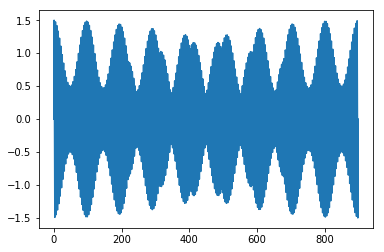

In [348]:
plt.plot(iii)

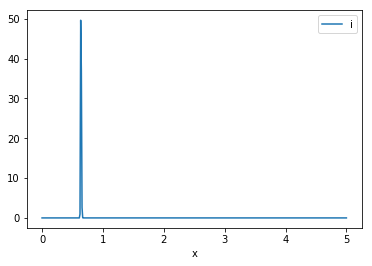

In [320]:
import scipy.stats
#fff = scipy.stats.norm(2.5, 0.001).pdf(x)
#fff = scipy.stats.poisson(2.5)#.pmf(k=x)#.pdf(x)
#fff = scipy.stats.poisson(2.5).cdf(x)#.pmf(k=x)#.pdf(x)
fff = scipy.stats.gamma(40.0, 0.6, 0.001).pdf(x)

#fff = np.zeros(len(x))

#fff[200] = 1.0

df = pd.DataFrame({'i':fff, 'x':x})#.plot(x='x', y='i')

df.plot(x='x', y='i')

In [321]:
def ffff(row):
    #print(row)
    return row.i * np.sin(2*pi*row.x*time) 


df_sin = df.apply(ffff, axis=1, result_type='expand')

In [322]:
df_sin_sum = df_sin.sum()

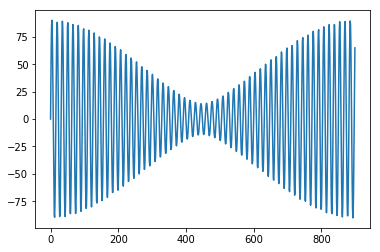

In [323]:
df_sin_sum.plot()

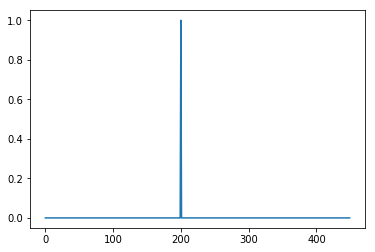

In [168]:
df.i.plot()

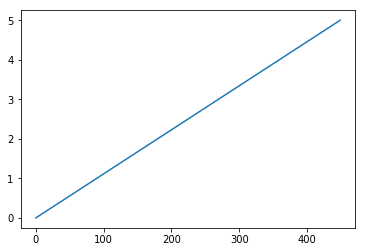

In [169]:
df.x.plot()

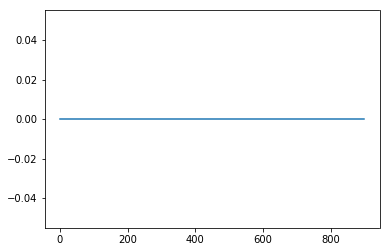

In [170]:
df_sin.iloc[10].plot()

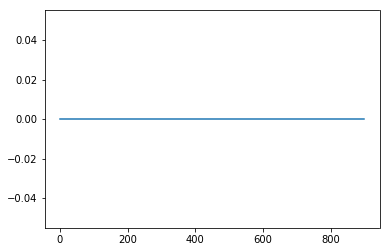

In [171]:
df_sin.iloc[100].plot()

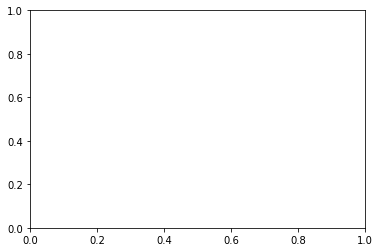

In [198]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

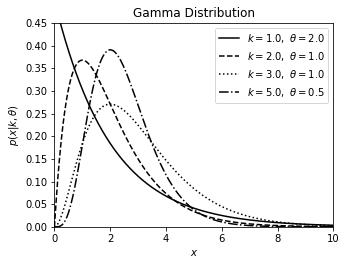

In [257]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import gamma
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# plot the distributions
k_values = [1, 2, 3, 5]
theta_values = [2, 1, 1, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(1E-6, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for k, t, ls in zip(k_values, theta_values, linestyles):
    dist = gamma(k, 0, t)
    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$k=%.1f,\ \theta=%.1f$' % (k, t))

plt.xlim(0, 10)
plt.ylim(0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k,\theta)$')
plt.title('Gamma Distribution')

plt.legend(loc=0)
plt.show()